In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

# Import tensorflow as the backend for Keras
from keras import backend as K
K.set_image_dim_ordering('tf')
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import TensorBoard

# Import required libraries for confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = os.getcwd()
# Define data path
data_path = 'data'
data_dir_list = os.listdir(data_path)
data_dir_list

['human', 'cats', 'flowers', 'dogs', 'bike', 'cars', 'horses']

In [4]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=50
# Define the number of classes
num_classes = 7
img_data_list=[]
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print("Loading Images of dataset: ", dataset, ", Count:", len(img_list))
    for image in img_list:
        input_img = cv2.imread(data_path+'/'+dataset+'/'+image)  #Read image
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)    #Change image from BGR (3d) to Grayscale (2d)
        input_img_resize=cv2.resize(input_img,(128,128))         #Resize it to 128x128 d
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255

Loading Images of dataset:  human , Count: 202
Loading Images of dataset:  cats , Count: 202
Loading Images of dataset:  flowers , Count: 210
Loading Images of dataset:  dogs , Count: 202
Loading Images of dataset:  bike , Count: 365
Loading Images of dataset:  cars , Count: 420
Loading Images of dataset:  horses , Count: 202


In [5]:
if num_channel == 1:
    if K.image_dim_ordering == 'th':
        img_data = np.expand_dims(img_data, axis=1)
        print(img_data.shape)
    else:
        img_data = np.expand_dims(img_data, axis=4)
        print(img_data.shape)
else:
    if K.image_dim_ordering()=='th':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)


(1803, 128, 128, 1)


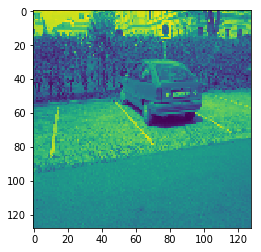

In [6]:
image = img_data[1181:1182].reshape((128,128))
plt.imshow(image)
plt.show()

In [7]:
# Assigning Labels
# Define the number of classes

num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:202]=0
labels[202:404]=1
labels[404:614]=2
labels[614:816]=3
labels[816:1181]=4
labels[1181:1601]=5
labels[1601:1803]=6

names = ['human', 'cats', 'flowers', 'dogs', 'bike', 'cars', 'horses' ]

In [8]:
# Convert class labels to on-hot encoding

Y = np_utils.to_categorical(labels, num_classes)

# Shuffle the dataset
x,y = shuffle(img_data, Y, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


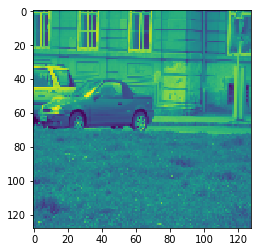

In [9]:
image = X_train[255].reshape((128,128))
plt.imshow(image)
plt.show()


In [10]:
# Designing and training a CNN model in Keras

#Initialising the input shape
input_shape=img_data[0].shape

# Design the CNN Sequential model
cnn_model = Sequential([
    Convolution2D(filters=32, kernel_size=3, strides=3, padding="same", activation="relu", input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)), 
    Convolution2D(filters=32, kernel_size=3, strides=3, activation="relu"),
    MaxPooling2D(pool_size=(2, 2)), 
    Dropout(0.5), 
    Flatten(), 
    Dense(128, activation="relu"), 
    Dropout(0.5), 
    Dense(128, activation="relu"), 
    Dropout(0.5), 
    Dense(128, activation="relu"), 
    Dropout(0.5), 
    Dense(128, activation="relu"), 
    Dropout(0.5), 
    Dense(num_classes, activation="softmax")
])

In [50]:
# model = Sequential()
# model.add(Convolution2D(32, (2, 2), input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Convolution2D(32, (2, 2), input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Convolution2D(32, (2, 2)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Convolution2D(64, (2, 2)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

In [11]:
# Compiling the model
cnn_model.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"])


In [12]:
cnn_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 43, 43, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               36992     
__________

In [13]:
# Train the model
hist = cnn_model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 1442 samples, validate on 361 samples
Epoch 1/50
1442/1442 [==============================] - 4s 3ms/step - loss: 1.9210 - acc: 0.2101 - val_loss: 1.9033 - val_acc: 0.2271
Epoch 2/50
1442/1442 [==============================] - 3s 2ms/step - loss: 1.9005 - acc: 0.2254 - val_loss: 1.8764 - val_acc: 0.2271
Epoch 3/50
1442/1442 [==============================] - 3s 2ms/step - loss: 1.8704 - acc: 0.2483 - val_loss: 1.8592 - val_acc: 0.2909
Epoch 4/50
1442/1442 [==============================] - 3s 2ms/step - loss: 1.8052 - acc: 0.2933 - val_loss: 1.7800 - val_acc: 0.3324
Epoch 5/50
1442/1442 [==============================] - 3s 2ms/step - loss: 1.7473 - acc: 0.3183 - val_loss: 1.6706 - val_acc: 0.3435
Epoch 6/50
1442/1442 [==============================] - 3s 2ms/step - loss: 1.7268 - acc: 0.3183 - val_loss: 1.8706 - val_acc: 0.2632
Epoch 7/50
1442/1442 [==============================] - 3s 2ms/step - loss: 1.6828 - acc: 0.3294 - val_loss: 1.7484 - val_acc: 0.3213
Epoch 8/50
1442

In [14]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

In [15]:
xc=range(num_epoch)

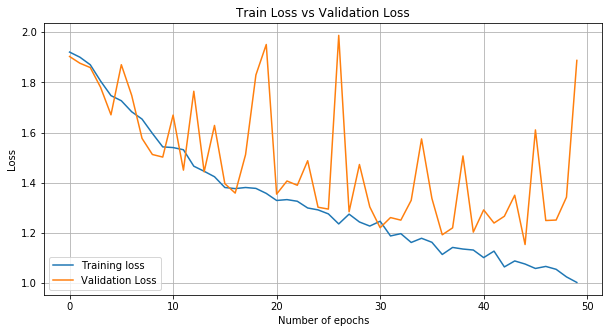

In [16]:
plt.figure(1, figsize=(10,5))
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)

plt.xlabel("Number of epochs")
plt.ylabel("Loss")

plt.title('Train Loss vs Validation Loss')
plt.legend(["Training loss", "Validation Loss"])
plt.grid(True)
plt.style.use(["classic"])
# plt.show()

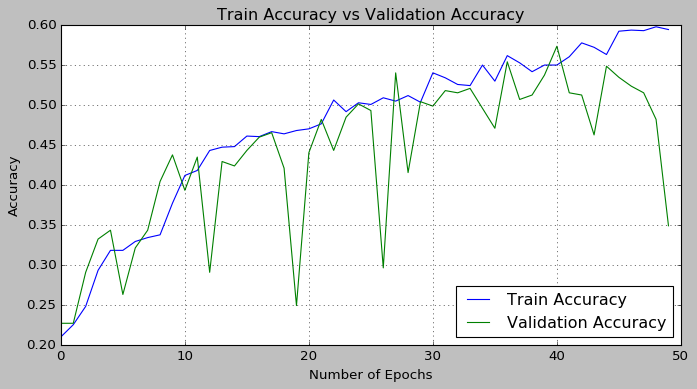

In [17]:
plt.figure(2,figsize=(10,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Train Accuracy','Validation Accuracy'],loc=4)
plt.style.use(['classic'])

In [18]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


Test Loss: 1.8877619745988925
Test Accuracy: 0.34903047116179214


In [19]:
y_test[1]

array([0., 0., 0., 0., 0., 1., 0.])

In [20]:
# Evaluating the model & Predicting the output class of a test image
# names = ['human-0', 'cats-1', 'flowers-2', 'dogs-3', 'bike-4', 'cars-5', 'horses-6' ]
test_image = X_test[223:224]
print(cnn_model.predict(test_image))
print(names[cnn_model.predict_classes(test_image)[0]])
print(names[np.argmax(y_test[223:224], axis=1)[0]])

[[0.00786842 0.23673898 0.00405814 0.21131204 0.07424042 0.4411464
  0.02463558]]
cars
cars


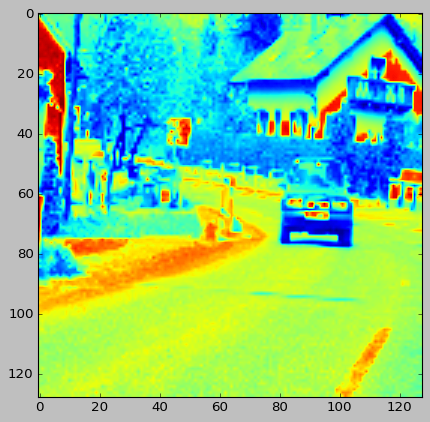

In [21]:
image = test_image.reshape((128,128))
plt.imshow(image)
plt.show()

In [22]:

# Test with a new image

test_img = cv2.imread('/home/devendra/Downloads/cat.163.jpg')
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
test_img = cv2.resize(test_img,(128,128))
test_img = np.array(test_img)
test_img = test_img.astype('float32')
test_img /= 255
print(test_img.shape)


error: OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [23]:
test_img= np.expand_dims(test_img, axis=3) 
test_img= np.expand_dims(test_img, axis=0) 
test_img.shape

(1, 1)

In [24]:
print(cnn_model.predict(test_img))
print(names[cnn_model.predict_classes(test_img)[0]])

ValueError: Error when checking : expected conv2d_1_input to have 4 dimensions, but got array with shape (1, 1)

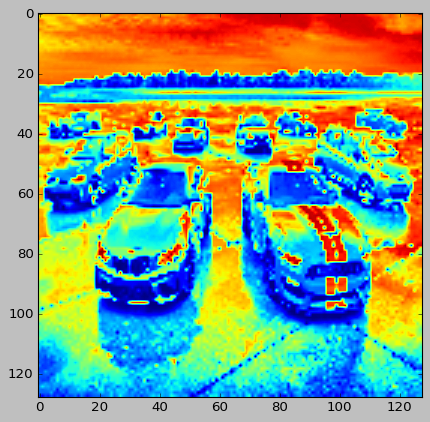

In [40]:
image = test_img.reshape((128,128))
plt.imshow(image)
plt.show()
